# Markov chain Monte Carlo: Metropolis Hastings

In [1]:
import hypothesis
import matplotlib.pyplot as plt

from hypothesis.inference.mcmc import MetropolisHastings
from hypothesis.inference.transition_distribution import Normal as NormalTransition
from torch.distributions.uniform import Uniform
from torch.distributions.normal import Normal

In [2]:
prior = Uniform(-10, 10)

In [3]:
def log_likelihood(theta, observations):
    return Normal(theta, 1).log_prob(observations).sum()

In [4]:
truth = 0.
observations = Normal(truth, 1).sample().view(-1, 1)

In [5]:
transition = NormalTransition(1)

In [6]:
sampler = MetropolisHastings(prior, log_likelihood, transition)

## Burnin chain

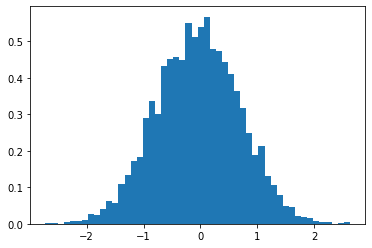

In [7]:
theta = prior.sample()
burnin_chain = sampler.sample(observations, theta, num_samples=10000)

plt.hist(burnin_chain.samples.numpy(), bins=50, density=True)
plt.show()

## Posterior

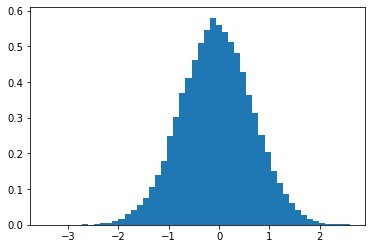

In [8]:
theta = burnin_chain[-1]
chain = sampler.sample(observations, theta, num_samples=100000)

plt.hist(chain.samples.numpy(), bins=50, density=True)
plt.show()